In [30]:
# 1. wzytaj `sales-not-clean.csv' do zmiennej 'sales' [use pandas]
import pandas as pd 
sales = pd.read_csv("../../sales-not-clean.csv")

In [31]:
# 2. Popatrzmy na pierwszych 10 wierzy 
sales.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,78.0,28.730493,5.352241,Macro,276.721133
1,39.0,8.027424,3.780098,Mega,141.087084
2,22.0,5.120817,2.205300,Micro,74.741604
3,77.0,31.943578,4.004854,Micro,274.583842
4,95.0,28.531574,5.572197,Mega,331.594008
5,80.0,32.200837,5.583016,Micro,282.617840
6,71.0,25.196766,8.050998,Mega,249.577754
7,73.0,19.183752,3.345825,Mega,262.281291
8,90.0,23.850970,1.784880,Macro,319.635864
9,23.0,4.523879,3.658954,Nano,83.352220


In [32]:
# Wartości podane w kolumnach numerycznych mierzone są w milionach usd - dla przykładu 
# pierwszy wiersz oznacza więc to, że kampania na którą wydano 78M usd w TV około 28M w Radio, 
# 5M w social media gdzie współpracowano z Influencerami o rozmiarze "Macro" (oznacza to duże zasięgi) 
# przyniosła sprzedaż na poziomie 276M USD 

<Axes: >

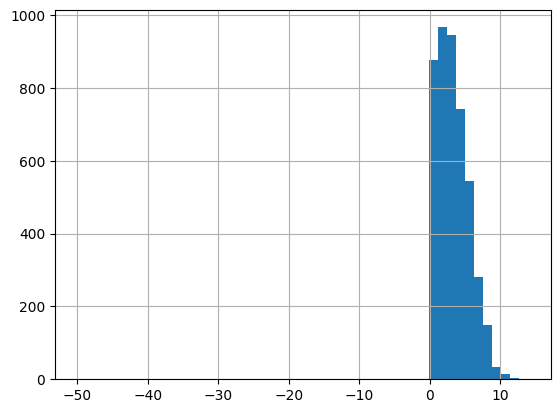

In [33]:
# 3. rzućmy okiem na dystrubucje zmiennej 'Social Media' [hist?]

sales['Social Media'].hist(bins=50)
# To co wydaje się interesujące to to, że oś współrzędnych zmiennej "Social Media" zawiera wartości ujemne 
# może to być dla nas hint sugerujący, że w zbiorze danych istnieją pewne obserwacje dla których 
# zmienna "Social Media" (budżet wydany na Social Media) jest ujemna - występują tam nienaturalne anomalie 
# będziemy wkrótce chcieli usunąć takie obserwacje z datasetu 

<Axes: >

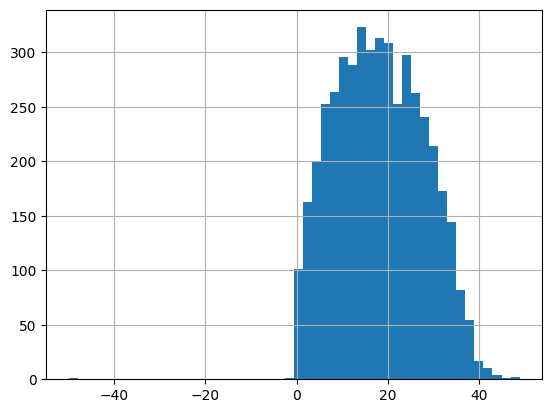

In [34]:
# 4. rzućmy okiem na dystrubucje pozostałych zmiennych TV / Radio i Sales 

# TV:
sales.Radio.hist(bins=50)

# Widzisz coś interesującego? (podobne wnioski jak wyżej) 

<Axes: >

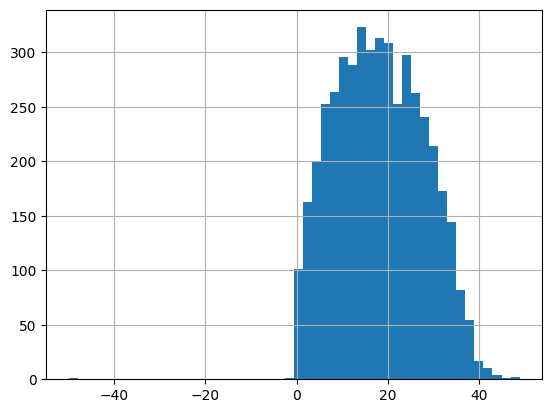

In [35]:
# Radio:
sales['Radio'].hist(bins=50)
# Widzisz coś interesującego? (podobne wnioski jak wyżej) 

<Axes: >

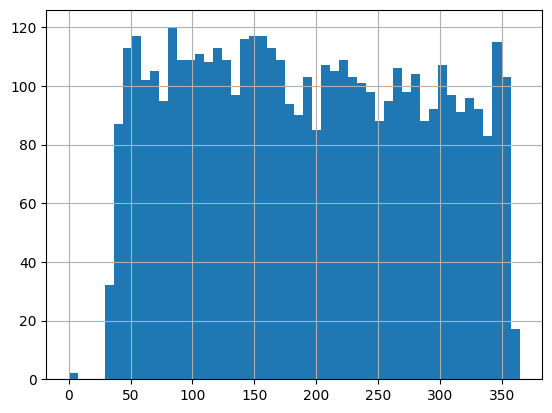

In [36]:
# Sales:
sales['Sales'].hist(bins=50)
# Widzisz coś interesującego? 
# (podobne wnioski jak wyżej - tutaj mamy mały słupek zerowych wartośc, które zdają się być nienaturalne) 

In [37]:
is_row_positive = (sales[['TV', 'Radio', 'Social Media', 'Sales']] > 0).all(axis=1)
# powyższy wektor (pd.Series) zawiera informacje o tym czy każda kolumna w danym wierszu jest dodatnia
print(f"Istnieją {(is_row_positive == False).sum()} wiersze które zawierają ujemne wartości")

Istnieją 33 wiersze które zawierają ujemne wartości


In [38]:
# 6. Pozbądźmy się znalezionych anomalii 
sales = sales[is_row_positive] 

In [39]:
# 7. zmapujemy kategoryczną zmienną Influencer do wartości numerycznej [Nano = 1, Micro = 2, Macro = 3, Mega = 4]
# Użyjmy funkcji map i zaaplikujmy poniższą funkcję influencer2numeric(category)

def influencer2numeric(category:str) -> int:
    if category == 'Nano':
        return 1 
    elif category == 'Micro':
        return 2 
    elif category == 'Macro':
        return 3
    elif category == 'Mega':
        return 4         

# assign dodaje kolumnę do df 
# Jeśli preferujesz alternatywne metody dodawania kolumny do DF - nic nie stoi na przeszkodzie by jej użyć 
sales = sales.assign(
    InfluencerNumeric = sales.Influencer.map(influencer2numeric) # wypełnij map odpowiednią wartością 
)


In [40]:
# 10. usuńmy starą zmienna "Influencer" 
sales = sales.drop(columns=['Influencer'])

In [41]:
# 9. Zapiszmy wynikowy dataframe jako "sales.csv"

In [56]:
sales.to_csv("../sales.csv", index=False)